<a href="https://colab.research.google.com/github/WilliamVoster/predictHousePricesTeamProject/blob/master/HousePricesProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What model??
- linear regression ?
- simple descition tree (see kaggle tutorial ML)
- more advanced descition forest (see kaggle tutorial ML)

Tutorial from kaggle:
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

Datafiles on GitHub: https://github.com/WilliamVoster/predictHousePricesTeamProject/tree/master/house-prices-advanced-regression-techniques

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## annoying error handling :(
pd.options.mode.chained_assignment = None


In [0]:
#fileLocation = "/content/drive/My Drive/train.csv"

githubURL = "https://raw.githubusercontent.com/WilliamVoster/predictHousePricesTeamProject/master/house-prices-advanced-regression-techniques/train.csv"

dataTrain = pd.read_csv(githubURL)

# How the files are made/setup:

![Explanation Image](https://raw.githubusercontent.com/WilliamVoster/predictHousePricesTeamProject/master/fileExplanation.png)

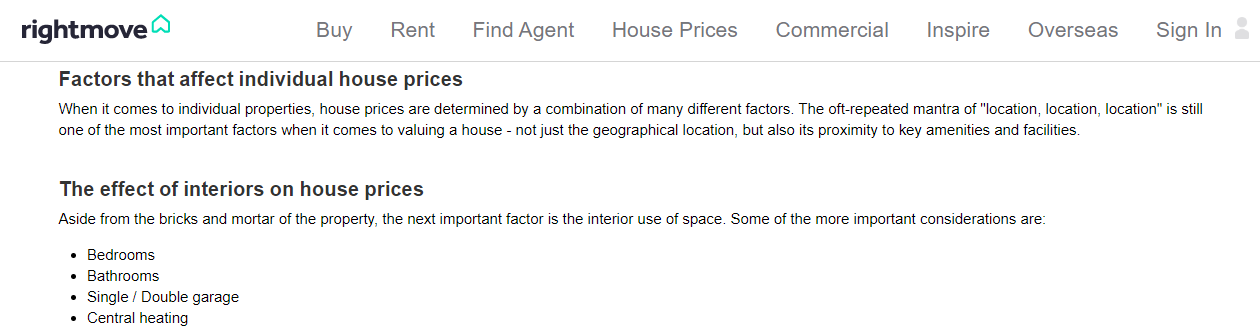

In [0]:
print(dataTrain.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [0]:
z = [0] * len(dataTrain.columns)
for i in range(len(dataTrain.columns)):
  z[i] = dataTrain.columns[i]
print(z.sort())

None


In [0]:
print(dataTrain["SalePrice"].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [0]:
dataTrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Transformations on different attributes

#### Define a function that can work for most columns:

In [0]:
normalizedTrainingData = dataTrain.copy()
# Function for replacing string values with more comuter-readable values from 0-1
def replaceVal(columnName, filter2d = [["empty", 0]]):

  columnLength = len(normalizedTrainingData[columnName])
  data = [None] * columnLength

  for i in range(columnLength):
    data[i] = str(normalizedTrainingData[columnName][i])

  for i in range(columnLength):
    for j in range(len(filter2d)):
      if data[i] == filter2d[j][0]:
        #print(data[i], filter2d[j][1])
        data[i] = filter2d[j][1]
        
  for i in range(columnLength):
    # normalizedTrainingData.loc[columnName, i] = data[i]
    normalizedTrainingData[columnName][i] = data[i]
  
  # print(normalizedTrainingData[columnName])
  # print(normalizedTrainingData[columnName].unique())
  # print(dataTrain[columnName].unique())
  # print(normalizedTrainingData[columnName].describe())

  return {"nameArr" : normalizedTrainingData[columnName].unique(), "valArr" : dataTrain[columnName].unique(), "data" : normalizedTrainingData[columnName]}

### Column: Alley
<table>
    <tr>
        <th>Value</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>Grvl</td>
        <td>Gravel</td>
    </tr>
    <tr>
        <td>Pave</td>
        <td>Paved</td>
    </tr>
    <tr>
        <td>NaN</td>
        <td>No alley access</td>
    </tr>
</table>

In [0]:
# arbitrary ranging the feature of having/type of alleyway leading to the house
alleyConvertingFilter = [["nan", 0], ["Grvl", 0.7], ["Pave", 1]]
replaceVal("Alley", alleyConvertingFilter)

{'data': 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 1455    0
 1456    0
 1457    0
 1458    0
 1459    0
 Name: Alley, Length: 1460, dtype: object, 'filterValues': 0       NaN
 1       NaN
 2       NaN
 3       NaN
 4       NaN
        ... 
 1455    NaN
 1456    NaN
 1457    NaN
 1458    NaN
 1459    NaN
 Name: Alley, Length: 1460, dtype: object, 'nameArr': array([0, 0.7, 1], dtype=object), 'valArr': array([nan, 'Grvl', 'Pave'], dtype=object)}

### Column: LotShape
<table>
    <tr>
        <th>Value</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>Reg</td>
        <td>Regular</td>
    </tr>
    <tr>
        <td>IR1</td>
        <td>Slightly irregular</td>
    </tr>
    <tr>
        <td>IR2</td>
        <td>Moderatly irregular</td>
    </tr>
    <tr>
        <td>IR3</td>
        <td>Irregular</td>
    </tr>
</table>

In [0]:
# same with alleyway; numbers indicate a what the text says. Easier for computer to understand??
lotShapeConvertingFilter = [["Reg", 0], ["IR1", 0.3], ["IR2", 0.6], ["IR3", 1]]
# replaceVal("LotShape", lotShapeConvertingFilter)

---
## Data exploration:

In [0]:
print(dataTrain["Alley"].unique())

dtAlleyColumn = pd.DataFrame(dataTrain["Alley"])

## Removes all the NaN (missing values) from the alley-column ::

dtAlleyColumnList = dtAlleyColumn.values.tolist()
filteredAlleyColumnList = []
for i in range(len(dtAlleyColumnList)):
  dtAlleyColumnList[i] = str(dtAlleyColumnList[i][0])
  if dtAlleyColumnList[i] != "nan":
    filteredAlleyColumnList.append({"id": i, "value": dtAlleyColumnList[i]})   

print(filteredAlleyColumnList)

[nan 'Grvl' 'Pave']
[{'id': 21, 'value': 'Grvl'}, {'id': 30, 'value': 'Pave'}, {'id': 56, 'value': 'Pave'}, {'id': 79, 'value': 'Grvl'}, {'id': 87, 'value': 'Pave'}, {'id': 92, 'value': 'Grvl'}, {'id': 106, 'value': 'Grvl'}, {'id': 115, 'value': 'Pave'}, {'id': 164, 'value': 'Pave'}, {'id': 204, 'value': 'Grvl'}, {'id': 217, 'value': 'Grvl'}, {'id': 246, 'value': 'Grvl'}, {'id': 264, 'value': 'Grvl'}, {'id': 281, 'value': 'Pave'}, {'id': 285, 'value': 'Pave'}, {'id': 291, 'value': 'Grvl'}, {'id': 297, 'value': 'Pave'}, {'id': 307, 'value': 'Grvl'}, {'id': 314, 'value': 'Grvl'}, {'id': 328, 'value': 'Pave'}, {'id': 361, 'value': 'Pave'}, {'id': 380, 'value': 'Pave'}, {'id': 381, 'value': 'Pave'}, {'id': 390, 'value': 'Grvl'}, {'id': 413, 'value': 'Grvl'}, {'id': 425, 'value': 'Grvl'}, {'id': 439, 'value': 'Grvl'}, {'id': 456, 'value': 'Grvl'}, {'id': 458, 'value': 'Grvl'}, {'id': 482, 'value': 'Pave'}, {'id': 497, 'value': 'Pave'}, {'id': 505, 'value': 'Grvl'}, {'id': 520, 'value': 'Grv

In [0]:
LotShapeList = dataTrain["LotShape"].unique().tolist()

# Creating a filter for converting string values to a gradient from 0 to 1

for i in range(len(LotShapeList)):

  if LotShapeList[i] == "Reg":
    LotShapeList[i] = [LotShapeList[i], 0]
  if LotShapeList[i] == "IR1":
    LotShapeList[i] = [LotShapeList[i], 0.3]
  if LotShapeList[i] == "IR2":
    LotShapeList[i] = [LotShapeList[i], 0.6]
  if LotShapeList[i] == "IR3":
    LotShapeList[i] = [LotShapeList[i], 1]
# Arbitrary numbers between 0 and 1: 0, 0.3, 0.6, 1

LotShapeConvertingFilter = LotShapeList[:]
print(LotShapeConvertingFilter)

[['Reg', 0], ['IR1', 0.3], ['IR2', 0.6], ['IR3', 1]]


In [0]:
importantAttributes = ["BedroomAbvGr", "FullBath", "HalfBath", "GarageArea", "GarageQual",  "GarageType",  "GarageCond",  "Heating"]

In [0]:
LotShapeList = dataTrain["LotShape"].unique().tolist()
for i in importantAttributes:
  print(dataTrain[i].unique().tolist())

[3, 4, 1, 2, 0, 5, 6, 8]
[2, 1, 3, 0]
[1, 0, 2]
[548, 460, 608, 642, 836, 480, 636, 484, 468, 205, 384, 736, 352, 840, 576, 516, 294, 853, 280, 534, 572, 270, 890, 772, 319, 240, 250, 271, 447, 556, 691, 672, 498, 246, 0, 440, 308, 504, 300, 670, 826, 386, 388, 528, 894, 565, 641, 288, 645, 852, 558, 220, 667, 360, 427, 490, 379, 297, 283, 509, 405, 758, 461, 400, 462, 420, 432, 506, 684, 472, 366, 476, 410, 740, 648, 273, 546, 325, 792, 450, 180, 430, 594, 390, 540, 264, 530, 435, 453, 750, 487, 624, 471, 318, 766, 660, 470, 720, 577, 380, 434, 866, 495, 564, 312, 625, 680, 678, 726, 532, 216, 303, 789, 511, 616, 521, 451, 1166, 252, 497, 682, 666, 786, 795, 856, 473, 398, 500, 349, 454, 644, 299, 210, 431, 438, 675, 968, 721, 336, 810, 494, 457, 818, 463, 604, 389, 538, 520, 309, 429, 673, 884, 868, 492, 413, 924, 1053, 439, 671, 338, 573, 732, 505, 575, 626, 898, 529, 685, 281, 539, 418, 588, 282, 375, 683, 843, 552, 870, 888, 746, 708, 513, 1025, 656, 872, 292, 441, 189, 880, 676, 

In [0]:
heatingFilter = [["GasA", 0], ["GasW", 0.2], ["Grav", 0.4], ["Wall", 0.6], ["OthW", 0.8], ["Floor", 1]]
#replaceVal("Heating", heatingFilter)

we were going to use heatingfilter as a variable to show the correlation between this and house prices, however we felt their wasnt enough of a spread of data to show a accurate correlaiton in a graph. 

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [0]:
normalizedTrainingData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,0,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,0,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,0,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,0,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,0.3,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,0,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,0.3,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,0,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,0.3,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,0,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

import seaborn as sb

In [0]:
replaceVal("Heating", heatingFilter)
valPartOfHeatingFilter = [0, 0.2, 0.4, 0.6, 0.8, 1]
obj = replaceVal("Heating", heatingFilter)
heatingName = obj["valArr"] #["GasA", "GasW"...]
heatingValues = obj["data"] #[0, 0, 0, 0, 0.2, 0, 0.6, 0, 0...]
heatingValues = heatingValues.values.tolist()
countValues = [0] * len(heatingName) # empty list of length = heatingName

for i in range(len(heatingValues)):
  heatingValues[i] = float(heatingValues[i])
print(heatingName, countValues, heatingValues)

for i in range(len(heatingValues)):
  for j in range(len(heatingName)):
    if heatingValues[i] == valPartOfHeatingFilter[j]:
      countValues[j] = countValues[j] + 1

print(heatingName, countValues)

['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor'] [0, 0, 0, 0, 0, 0] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [0]:
def barChart(column, colFilter):
  obj = replaceVal(column, colFilter)
  names = obj["valArr"]
  filterVals = [0]*len(colFilter)
  for i in range(len(filterVals)):
    filterVals[i] = colFilter[i][1]
  counts = [0] * len(names)
  data = obj["data"]
  data.values.tolist()

  for i in range(len(data)):
    data[i] = float(data[i])
  
  for i in range(len(data)):
    for j in range(len(names)):
      # print(filterVals[j])
      if data[i] == filterVals[j]:
        # print("test")
        counts[j] = counts[j] +1

  y_pos = np.arange(len(names))
  performance = counts #[10,8,6,4,2,1]

  plt.bar(y_pos, performance, align='center', alpha=0.5)
  plt.xticks(y_pos, names)
  plt.ylabel('Counts')
  plt.title('Names of values')

  plt.show()

  return names, counts


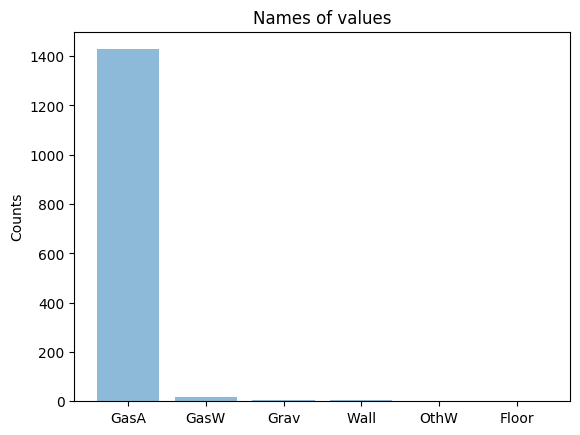

(array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'], dtype=object), [1428, 18, 7, 4, 2, 1])


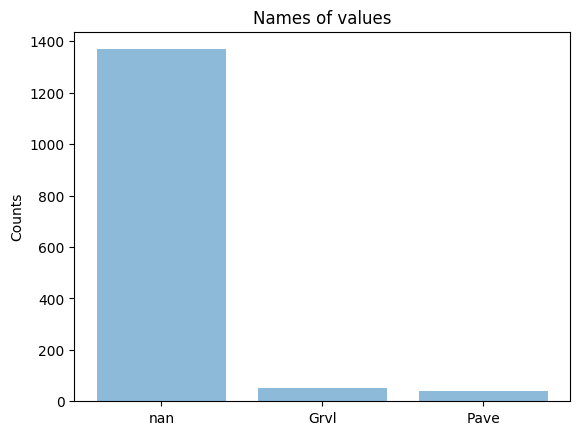

(array([nan, 'Grvl', 'Pave'], dtype=object), [1369, 50, 41])


In [0]:
print( )
print(barChart("Alley", alleyConvertingFilter))

# How we're supposed to submit our predictions to Kaggle:

"generates test predictions that are saved to a CSV file"
### Fit the model to the training data
my_model.fit(X, y)

### Generate test predictions
preds_test = my_model.predict(X_test)

#33 Save predictions in format used for competition scoring
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)